In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

count = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        response = requests.get(query + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"Processing Record {count} | {city}")
        count += 1
        
    except:
        print("City not found. Skipping...")
        continue
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | castro
Processing Record 2 | necochea
Processing Record 3 | ust-nera
Processing Record 4 | martapura
Processing Record 5 | albany
Processing Record 6 | geraldton
Processing Record 7 | kahului
Processing Record 8 | ushuaia
Processing Record 9 | cape town
Processing Record 10 | airai
Processing Record 11 | mattru
City not found. Skipping...
Processing Record 12 | kemi
Processing Record 13 | bathsheba
Processing Record 14 | arraial do cabo
Processing Record 15 | itamaraca
Processing Record 16 | punta arenas
Processing Record 17 | butaritari
Processing Record 18 | nanning
Processing Record 19 | port blair
City not found. Skipping...
Processing Record 20 | canyon
Processing Record 21 | bethel
Processing Record 22 | karachi
Processing Record 23 | amapa
Processing Record 24 | bredasdorp
Processing Record 25 | kargil
Processing Record 26 | luderitz
Processing Record 27 | saint-philippe
Processing Record 28 | zhuhai
Pr

City not found. Skipping...
Processing Record 235 | riosucio
Processing Record 236 | college
Processing Record 237 | tautira
City not found. Skipping...
Processing Record 238 | belmonte
Processing Record 239 | klaksvik
Processing Record 240 | ozernovskiy
Processing Record 241 | san rafael
Processing Record 242 | saint george
Processing Record 243 | shellbrook
Processing Record 244 | igarka
Processing Record 245 | port lincoln
Processing Record 246 | herat
City not found. Skipping...
Processing Record 247 | pak phanang
Processing Record 248 | barra do garcas
Processing Record 249 | inuvik
Processing Record 250 | kabinda
Processing Record 251 | lewiston
Processing Record 252 | cervo
Processing Record 253 | tiarei
Processing Record 254 | alta floresta
Processing Record 255 | poddorye
City not found. Skipping...
Processing Record 256 | eureka
Processing Record 257 | sabang
Processing Record 258 | chara
Processing Record 259 | rocha
Processing Record 260 | hobyo
Processing Record 261 | cara

Processing Record 465 | te anau
Processing Record 466 | dargaville
Processing Record 467 | kita
Processing Record 468 | mana
Processing Record 469 | risor
Processing Record 470 | gulmarg
Processing Record 471 | provideniya
Processing Record 472 | nizhniy kuranakh
Processing Record 473 | ko samui
Processing Record 474 | montalvo
Processing Record 475 | port hardy
Processing Record 476 | zabreh
Processing Record 477 | idrija
Processing Record 478 | song phi nong
Processing Record 479 | san jose
Processing Record 480 | port hawkesbury
Processing Record 481 | kosh-agach
Processing Record 482 | yatou
Processing Record 483 | sibiti
Processing Record 484 | nome
Processing Record 485 | deyang
Processing Record 486 | khor
Processing Record 487 | ola
Processing Record 488 | dillon
Processing Record 489 | kolokani
Processing Record 490 | lichtenburg
City not found. Skipping...
Processing Record 491 | grindavik
Processing Record 492 | naron
Processing Record 493 | angoram
Processing Record 494 | f

In [6]:
data = {
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date}

weather_df = pd.DataFrame(data)
weather_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [7]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,56.53,91,75,7.78,BR,1638609499
1,Necochea,-38.5473,-58.7368,46.04,78,1,8.12,AR,1638609661
2,Ust-Nera,64.5667,143.2000,-37.39,99,69,3.44,RU,1638609497
3,Martapura,-3.4167,114.8500,86.09,74,40,6.91,ID,1638609661
4,Albany,42.6001,-73.9662,31.68,76,65,2.48,US,1638609489
...,...,...,...,...,...,...,...,...,...
566,Gerāsh,27.6652,54.1371,69.94,34,4,0.76,IR,1638609700
567,Kedrovyy,56.1667,91.8167,28.87,93,100,14.03,RU,1638609700
568,Mweka,-4.8500,21.5667,86.16,55,100,3.11,CD,1638609701
569,Trani,41.2727,16.4154,53.85,63,24,8.99,IT,1638609655


Inspect the data and remove the cities where the humidity > 100%.

In [9]:
weather_df["Humidity"].describe(include="all")

count    571.000000
mean      71.898424
std       21.673660
min        8.000000
25%       60.000000
50%       77.000000
75%       89.000000
max      100.000000
Name: Humidity, dtype: float64

In [75]:
weather_df.to_csv("weather_df.csv")
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,56.53,91,75,7.78,BR,1638609499
1,Necochea,-38.5473,-58.7368,46.04,78,1,8.12,AR,1638609661
2,Ust-Nera,64.5667,143.2000,-37.39,99,69,3.44,RU,1638609497
3,Martapura,-3.4167,114.8500,86.09,74,40,6.91,ID,1638609661
4,Albany,42.6001,-73.9662,31.68,76,65,2.48,US,1638609489


# Plotting the Data

Latitude vs. Temperature Plot

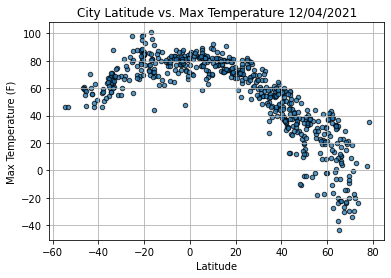

In [65]:
date = time.strftime("%m/%d/%Y")

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

Latitude vs. Humidity Plot

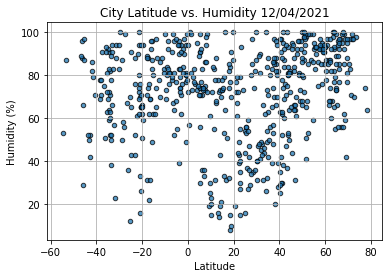

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Humidity.png")
plt.show()

Latitude vs. Cloudiness Plot

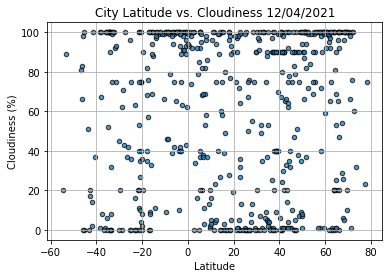

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

Latitude vs. Wind Speed Plot

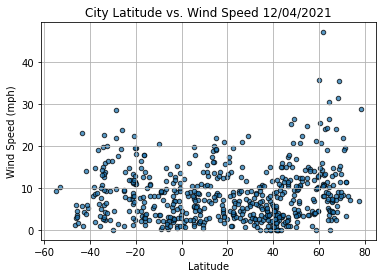

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

# Linear Regression

Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
#Northern Hemisphere 
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]

#Southern Hemisphere
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -1.32x + 95.63
The r-value is: -0.8819004093370371
Scatter plot displays a negative correlation.
The temperature decreases as you move away from the equator.


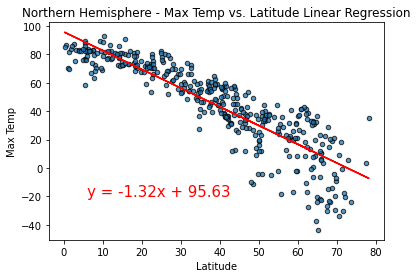

In [66]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays a negative correlation.")
print("The temperature decreases as you move away from the equator.")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.52x + 84.0
The r-value is: 0.5923416267102206
Scatter plot displays a positive correlation.
The temperature decreases as you move away from the equator.


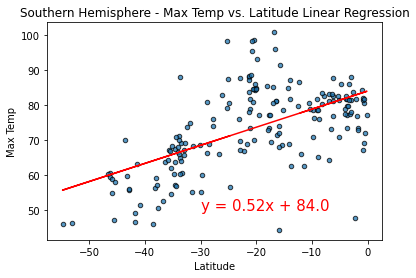

In [67]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays a positive correlation.")
print("The temperature decreases as you move away from the equator.")
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.4x + 55.53
Regression line equation is: y = 0.4x + 55.53
The r-value is: 0.3574762022647678
Scatter plot displays no correlation between the data sets.


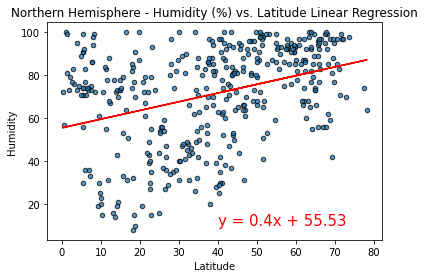

In [68]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.") 
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.25x + 78.89
The r-value is: 0.184486825486217
Scatter plot displays no correlation between the data sets.


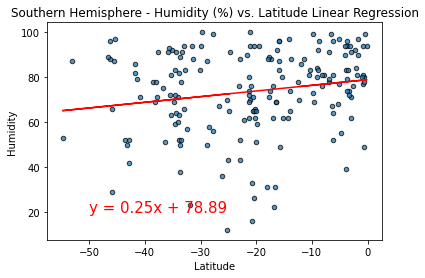

In [69]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Humidity"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 47.48
The r-value is: 0.14443703637622565
Scatter plot displays no correlation between the data sets.


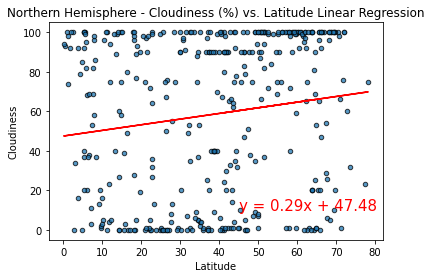

In [70]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.")
plt.show()

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.84x + 80.57
The r-value is: 0.2975109154731601
Scatter plot displays no correlation between the data sets.


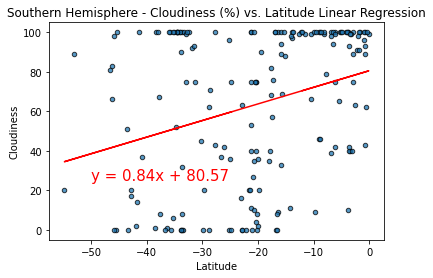

In [71]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 5.82
The r-value is: 0.21268599605933125
Scatter plot displays no correlation between the data sets.


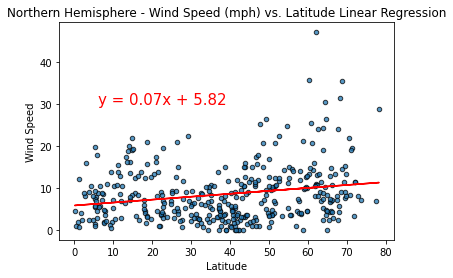

In [72]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 6.96
The r-value is: -0.15006541155744244
Scatter plot displays no correlation between the data sets.


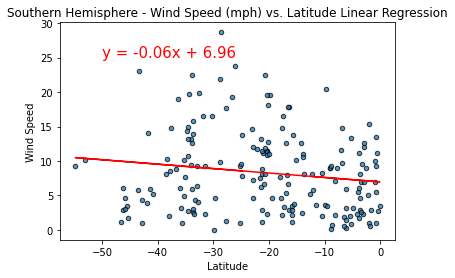

In [73]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed"]).astype(float)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, marker="o",s=20,alpha=.75, edgecolors="k")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"Regression line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")
print("Scatter plot displays no correlation between the data sets.")
plt.show()